In [3]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

img = keras_ocr.tools.read('images/sample.jpg')

prediction_groups = pipeline.recognize([img])


Looking for /home/rdave/.keras-ocr/craft_mlt_25k.h5
Looking for /home/rdave/.keras-ocr/crnn_kurapan.h5


2024-02-24 12:50:04.098395: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720371712 exceeds 10% of free system memory.
2024-02-24 12:50:04.227553: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720371712 exceeds 10% of free system memory.
2024-02-24 12:50:04.431216: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720371712 exceeds 10% of free system memory.
2024-02-24 12:50:05.125020: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 720371712 exceeds 10% of free system memory.
2024-02-24 12:50:05.302549: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180092928 exceeds 10% of free system memory.


2/2 [==============================] - 3s 848ms/step


In [18]:
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

#example of a line mask for the word "Kitchen"
box = prediction_groups[0][10]
x0, y0 = box[1][0]
x1, y1 = box[1][1]
x2, y2 = box[1][2]
x3, y3 = box[1][3]

x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [20]:
import cv2

mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

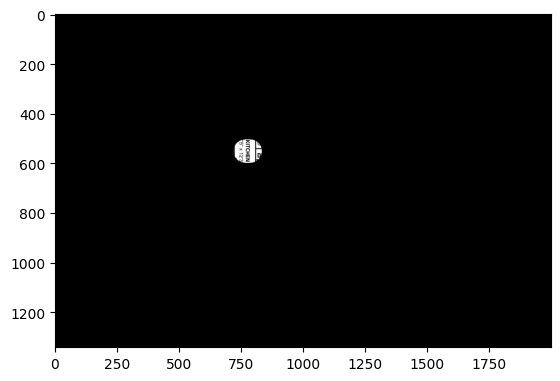

In [21]:
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

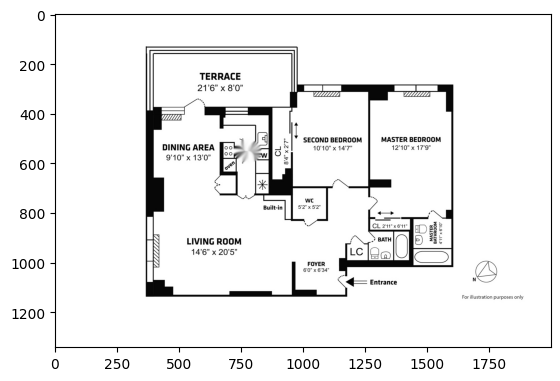

In [22]:
img_inpainted = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)

In [4]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

input_img = imread('images/floor4.png')

import pyclesperanto_prototype as cle
cle.select_device('RTX')

/home/rdave/Spring24/mit-hackathon/mit-hack/lib/python3.10/site-packages/pyclesperanto_prototype/_tier0/_device.py:77: UserWarning: No OpenCL device found with RTX in their name. Using pthread-Intel(R) Core(TM) i7-10850H CPU @ 2.70GHz instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<pthread-Intel(R) Core(TM) i7-10850H CPU @ 2.70GHz on Platform: Portable Computing Language (12 refs)>

In [6]:
input_gpu = cle.push(input_img)

8 warnings generated.
8 warnings generated.
9 warnings generated.


size: 567


8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.
8 warnings generated.


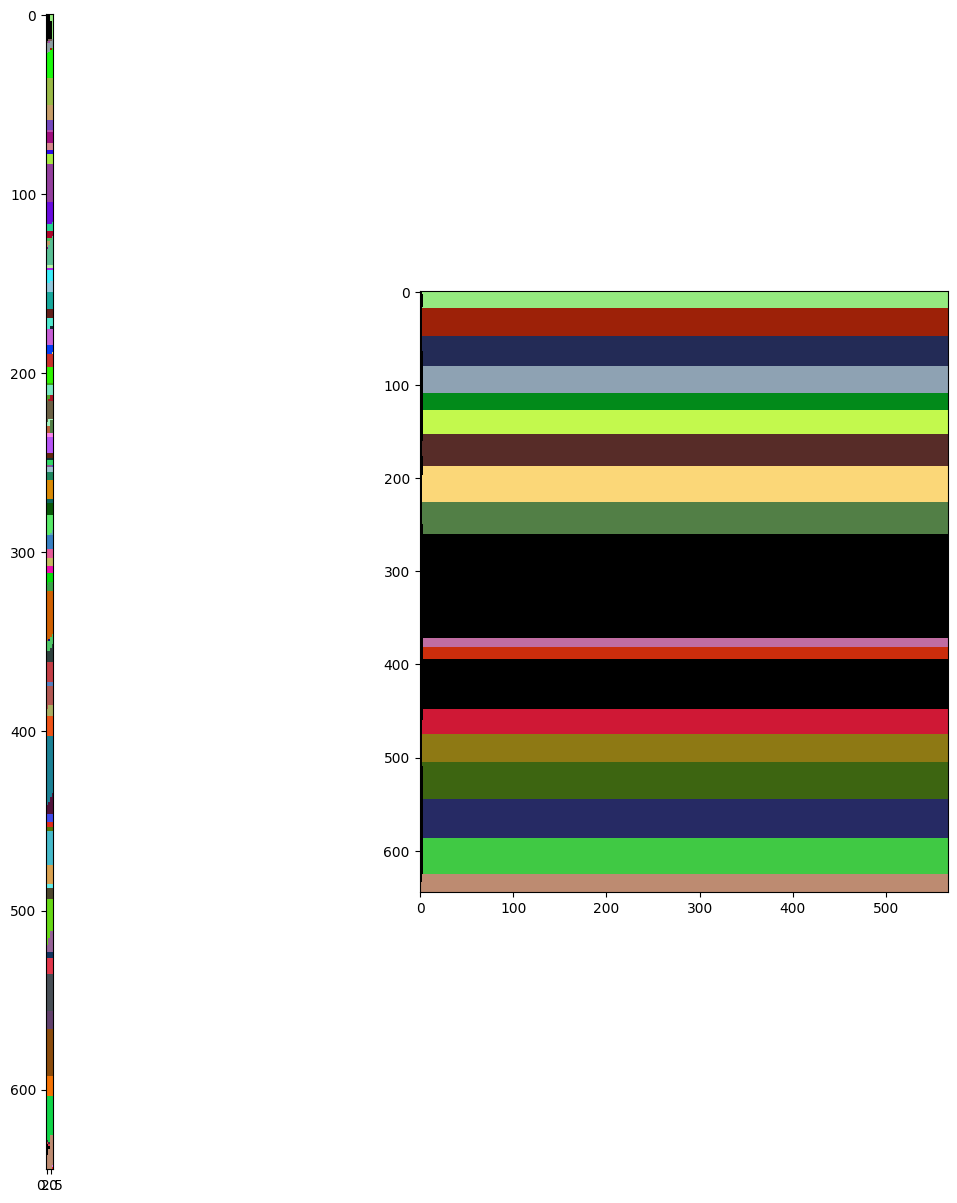

In [7]:
sigma_spot_detection = 5
sigma_outline = 10

segmented = cle.voronoi_otsu_labeling(input_gpu, spot_sigma=sigma_spot_detection, outline_sigma=sigma_outline)
segmented_crop = cle.crop(segmented, start_x=0, start_y=0, width=567, height=645)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])